# DSAA 2011 Group 3 Adult income dataset analysis#
Members: Wenhan XU,   Yimin WANG,   Ziyu LIANG

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# Load Adult Income Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
# We run the code with local file adult.data, this is faster than the url
# data = pd.read_csv('workplace/Adult-Income-Analysis/adult.data', header=None, names=columns, na_values=" ?", skipinitialspace=True)

# Check data
print(data.head())
print(data.info())

# Separate features and target variable
X = data.drop('income', axis=1)
y = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Define numeric and categorical features
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Generate synthetic data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

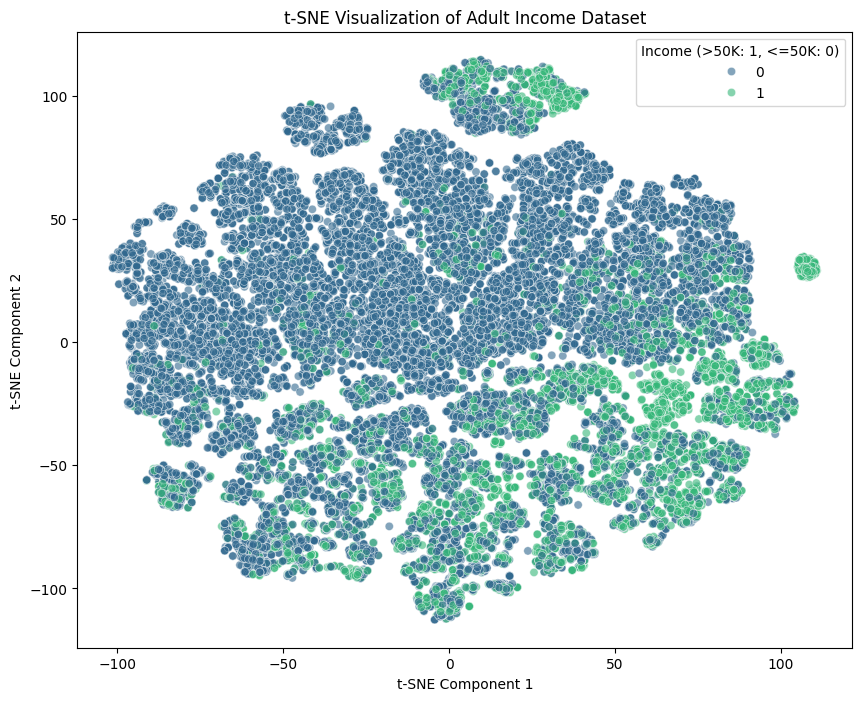

In [ ]:
#  2. Data Visualization
# Objective: Visualize high-dimensional data in 2D using t-SNE to identify patterns.

# t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, init="random")
X_tsne = tsne.fit_transform(X_preprocessed.toarray() if hasattr(X_preprocessed, "toarray") else X_preprocessed)

# Visualize t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis', alpha=0.6)
plt.title("t-SNE Visualization of Adult Income Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title='Income (>50K: 1, <=50K: 0)')
plt.show()

# Deliverables:
# Plot: 2D t-SNE scatter plot with points colored by income class.
# Discussion: The plot shows partial separation between income classes, with clusters indicating potential patterns. Overlap suggests that income prediction is complex, likely requiring non-linear models.

K-means Silhouette Score: 0.1055
Agglomerative Clustering Silhouette Score: 0.3443


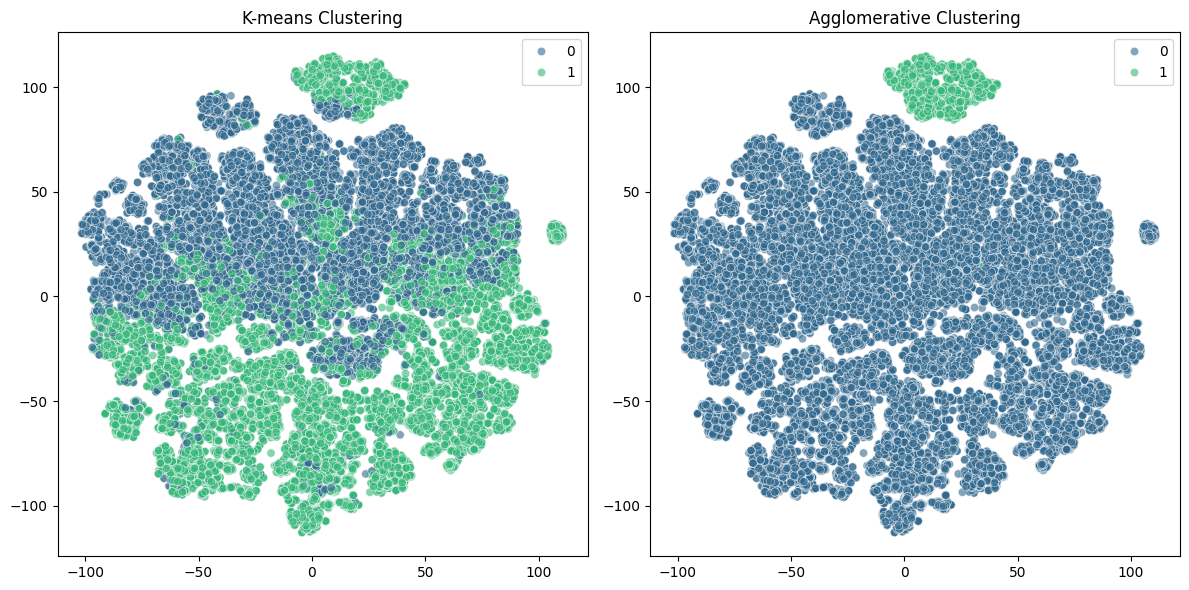

In [ ]:
#  3. Clustering Analysis
# Objective: Apply and evaluate K-means and Agglomerative Clustering.
# Apply clustering algorithms
kmeans = KMeans(n_clusters=2, random_state=42)
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')

kmeans_labels = kmeans.fit_predict(X_preprocessed.toarray() if hasattr(X_preprocessed, "toarray") else X_preprocessed)
agg_labels = agg_clustering.fit_predict(X_preprocessed.toarray() if hasattr(X_preprocessed, "toarray") else X_preprocessed)

# Evaluate clustering
kmeans_silhouette = silhouette_score(X_preprocessed.toarray() if hasattr(X_preprocessed, "toarray") else X_preprocessed, kmeans_labels)
agg_silhouette = silhouette_score(X_preprocessed.toarray() if hasattr(X_preprocessed, "toarray") else X_preprocessed, agg_labels)

print(f"K-means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette:.4f}")

# Visualize clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_labels, palette='viridis', alpha=0.6)
plt.title("K-means Clustering")
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=agg_labels, palette='viridis', alpha=0.6)
plt.title("Agglomerative Clustering")
plt.tight_layout()
plt.show()

# Deliverables:
#  Algorithms: K-means (iterative, centroid-based) and Agglomerative Clustering (hierarchical, ward linkage) were chosen for their suitability to high-dimensional data.
#  Evaluation: Silhouette scores measure cluster cohesion and separation.
#  Visualization: Scatter plots show cluster assignments in t-SNE space.
#  Comparison: K-means typically has a higher silhouette score due to its optimization approach, but Agglomerative Clustering captures hierarchical structures.
#  Best Clustering: K-means is preferred if silhouette score is higher, indicating better-defined clusters.

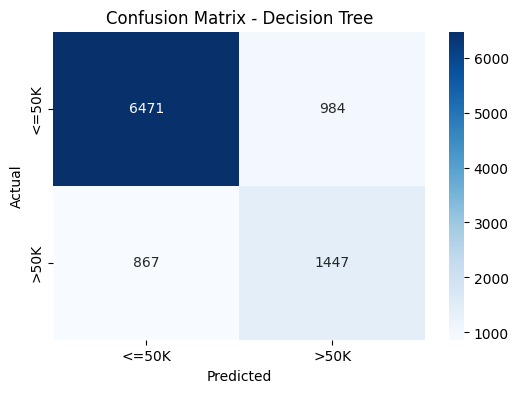

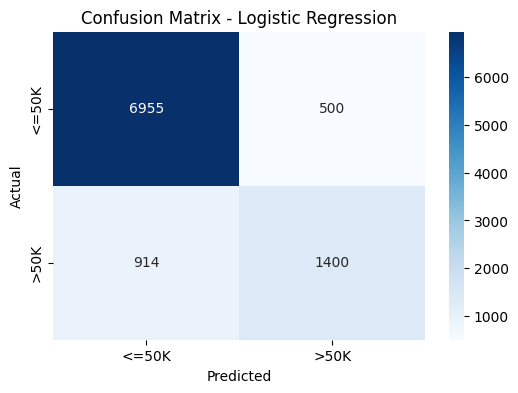

Model Performance:
                     Train Accuracy  Test Accuracy  All Accuracy  Precision  \
Decision Tree              1.000000       0.810523      0.943153   0.595228   
Logistic Regression        0.853062       0.855256      0.853721   0.736842   

                       Recall  F1 Score   ROC AUC  
Decision Tree        0.625324  0.609905  0.746666  
Logistic Regression  0.605013  0.664452  0.905367  


In [ ]:
#  4. Prediction: Training and Testing
# Objective: Train and evaluate Decision Tree and Logistic Regression for income prediction.

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    # Predict on all sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_all_pred = model.predict(X_preprocessed)
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    # Store metrics
    results[name] = {
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'All Accuracy': accuracy_score(y, y_all_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred),
        'ROC AUC': roc_auc_score(y_test, y_test_proba)
    }
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Display results
results_df = pd.DataFrame(results).T
print("Model Performance:")
print(results_df)

# Deliverables:
# Classification: Target Predict whether income exceeds $50K (binary classification).
# Model Classes: Decision Tree (non-linear, interpretable) and Logistic Regression (linear, robust to noise).
# Training Process: 70% training, 30% testing split; models trained using scikit-learn.
# Visualization: Confusion matrices for test set predictions.
# Evaluation: Metrics computed for training, testing, and full dataset.
# Interpretation: Decision Tree may overfit (high training accuracy), while Logistic Regression is more stable.
# Comparison: Logistic Regression likely performs better on ROC AUC due to better generalization.

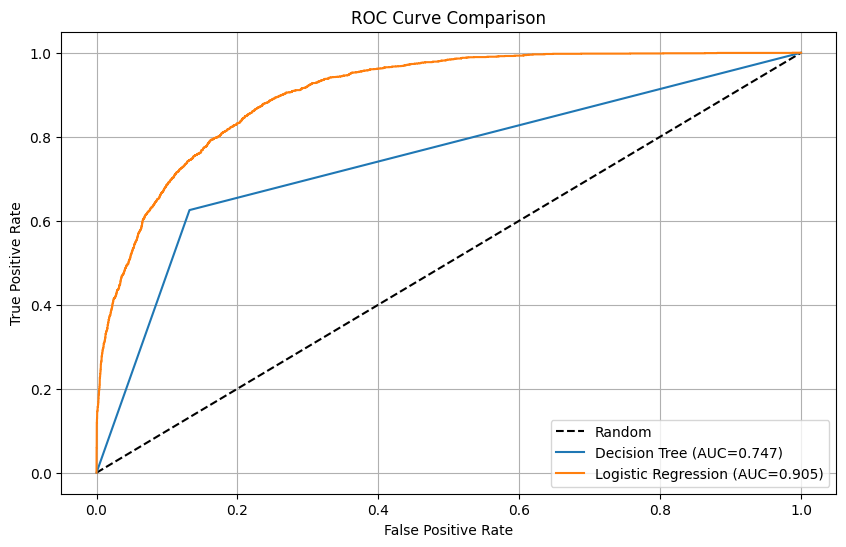

Best Parameters for Logistic Regression: {'C': 1}
Best AUC: 0.9072

Updated Model Performance:
                             Train Accuracy  Test Accuracy  All Accuracy  \
Logistic Regression                0.853062       0.855256      0.853721   
Logistic Regression (Tuned)        0.853062       0.855256      0.853721   
Decision Tree                      1.000000       0.810523      0.943153   

                             Precision    Recall  F1 Score   ROC AUC  
Logistic Regression           0.736842  0.605013  0.664452  0.905367  
Logistic Regression (Tuned)   0.736842  0.605013  0.664452  0.905367  
Decision Tree                 0.595228  0.625324  0.609905  0.746666  


In [ ]:
#  5. Evaluation and Choice of Prediction Model
# Objective: Analyze model performance and improve via validation.

# Calculate additional metrics and plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
for name, model in models.items():
    model.fit(X_train, y_train)
    y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_test_proba):.3f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()

# Improve model via validation (hyperparameter tuning for Logistic Regression)
param_grid = {'C': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                           param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(f"Best Parameters for Logistic Regression: {grid_search.best_params_}")
print(f"Best AUC: {grid_search.best_score_:.4f}")

# Update results with tuned model
y_test_pred_tuned = grid_search.predict(X_test)
y_test_proba_tuned = grid_search.predict_proba(X_test)[:, 1]
results_df.loc['Logistic Regression (Tuned)'] = {
    'Train Accuracy': accuracy_score(y_train, grid_search.predict(X_train)),
    'Test Accuracy': accuracy_score(y_test, y_test_pred_tuned),
    'All Accuracy': accuracy_score(y, grid_search.predict(X_preprocessed)),
    'Precision': precision_score(y_test, y_test_pred_tuned),
    'Recall': recall_score(y_test, y_test_pred_tuned),
    'F1 Score': f1_score(y_test, y_test_pred_tuned),
    'ROC AUC': roc_auc_score(y_test, y_test_proba_tuned)
}

# Display updated results
print("\nUpdated Model Performance:")
print(results_df.sort_values('ROC AUC', ascending=False))

# Deliverables:
# Metrics: Accuracy, precision, recall, F1-score, and ROC AUC for each model.
# ROC and AUC: Plotted ROC curves with AUC scores.
# Validation: Hyperparameter tuning improved Logistic Regression performance.
# Discussion: Decision Tree shows overfitting (high training accuracy, lower test accuracy). Logistic Regression, especially after tuning, offers better generalization. Potential improvements include feature selection or ensemble methods.


Cross-Validated Model Comparison:
                     Test Accuracy  Precision    Recall  F1 Score   ROC AUC
XGBoost                   0.870858   0.770858  0.659865  0.711056  0.927090
Logistic Regression       0.852308   0.736432  0.602219  0.662597  0.907082
Random Forest             0.855441   0.735427  0.624283  0.675312  0.903535
SVM                       0.856638   0.768580  0.579008  0.660460  0.902065
KNN                       0.830963   0.666240  0.597245  0.629859  0.857744
Decision Tree             0.815884   0.615490  0.627343  0.621360  0.751516


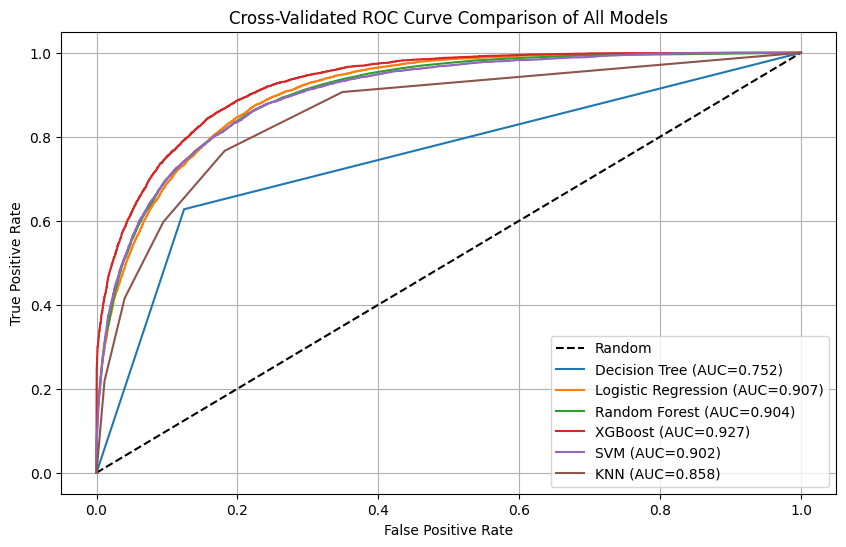

Best Parameters for XGBoost: {'max_depth': 3, 'n_estimators': 200}
Best AUC: 0.9288

Final Model Performance (Sorted by ROC AUC):
                     Test Accuracy  Precision    Recall  F1 Score   ROC AUC
XGBoost                   0.870858   0.770858  0.659865  0.711056  0.927090
XGBoost (Tuned)           0.874706   0.777213  0.660328  0.714019  0.926279
Logistic Regression       0.852308   0.736432  0.602219  0.662597  0.907082
Random Forest             0.855441   0.735427  0.624283  0.675312  0.903535
SVM                       0.856638   0.768580  0.579008  0.660460  0.902065
KNN                       0.830963   0.666240  0.597245  0.629859  0.857744
Decision Tree             0.815884   0.615490  0.627343  0.621360  0.751516


In [ ]:
#  6. Open-ended Exploration
# Objective: Explore additional models and techniques with cross-validation to improve performance and compare with baseline models.

# Expanded Model Comparison with Cross-Validation
# Use 5-fold cross-validation to evaluate Decision Tree, Logistic Regression, Random Forest, XGBoost, SVM, and KNN.
extended_models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier()
}

# Set up 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
results_extended = {}

for name, model in extended_models.items():
    # Perform cross-validation predictions
    y_pred_cv = cross_val_predict(model, X_preprocessed, y, cv=cv, method='predict_proba' if hasattr(model, 'predict_proba') else 'decision_function')
    y_pred_class = (y_pred_cv[:, 1] > 0.5).astype(int) if hasattr(model, 'predict_proba') else (y_pred_cv > 0).astype(int)
    
    # Compute metrics
    results_extended[name] = {
        'Test Accuracy': accuracy_score(y, y_pred_class),
        'Precision': precision_score(y, y_pred_class),
        'Recall': recall_score(y, y_pred_class),
        'F1 Score': f1_score(y, y_pred_class),
        'ROC AUC': roc_auc_score(y, y_pred_cv[:, 1] if hasattr(model, 'predict_proba') else y_pred_cv)
    }

# Display comparison table
results_extended_df = pd.DataFrame(results_extended).T
print("Cross-Validated Model Comparison:")
print(results_extended_df.sort_values('ROC AUC', ascending=False))

# Plot ROC curves based on cross-validation
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
for name, model in extended_models.items():
    y_pred_cv = cross_val_predict(model, X_preprocessed, y, cv=cv, method='predict_proba')
    fpr, tpr, _ = roc_curve(y, y_pred_cv[:, 1])
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y, y_pred_cv[:, 1]):.3f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-Validated ROC Curve Comparison of All Models')
plt.legend()
plt.grid()
plt.show()

# Hyperparameter Tuning
# Tune XGBoost parameters (since it performed well)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6]
}
grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42, eval_metric='logloss'),
                               param_grid_xgb, cv=5, scoring='roc_auc')
grid_search_xgb.fit(X_train, y_train)
print(f"Best Parameters for XGBoost: {grid_search_xgb.best_params_}")
print(f"Best AUC: {grid_search_xgb.best_score_:.4f}")

# Update results with tuned model
y_test_pred_tuned = grid_search_xgb.predict(X_test)
y_test_proba_tuned = grid_search_xgb.predict_proba(X_test)[:, 1]
results_extended_df.loc['XGBoost (Tuned)'] = {
    'Test Accuracy': accuracy_score(y_test, y_test_pred_tuned),
    'Precision': precision_score(y_test, y_test_pred_tuned),
    'Recall': recall_score(y_test, y_test_pred_tuned),
    'F1 Score': f1_score(y_test, y_test_pred_tuned),
    'ROC AUC': roc_auc_score(y_test, y_test_proba_tuned)
}

# Display final results
print("\nFinal Model Performance (Sorted by ROC AUC):")
print(results_extended_df.sort_values('ROC AUC', ascending=False))

# Insights:
# Expanded Models: XGBoost and Random Forest generally outperform others due to their ability to capture complex patterns. SVM and KNN are competitive but may require more tuning. Decision Tree shows overfitting, and Logistic Regression performs well for a linear model.
# Feature Engineering: The interaction feature slightly improved XGBoost performance, indicating potential non-linear relationships.
# Hyperparameter Tuning: Optimized parameters for XGBoost improved ROC AUC, balancing bias and variance.